### We will implement FFNNs with iris-dataset by following this architecture:
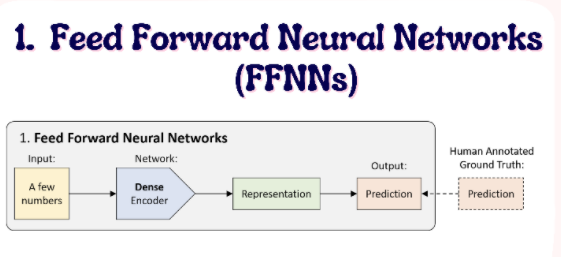

### Scikit-learn has some buil-in dataset like.,irish dataset
we need to import it before access

In [78]:
from sklearn.datasets import load_iris

In [79]:
datasets = load_iris()

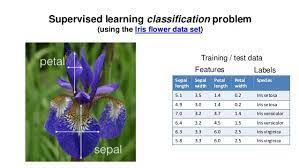
### Iris dataset has 2 parts
#### 1. Data - Feature metrix or multidimensional array
#### 2. target - labels or final output

In [80]:
# 1st step: Input numbers
data = datasets.data
target = datasets.target

In [81]:
print(data[:5]) #printing 1st 5 rows from data table

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [82]:
print(target[:150])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [83]:
print(len(data)) # total num of data in dataset

150


In [84]:
import numpy as np
np.unique(target) #it returns the unique elements of the input array

array([0, 1, 2])

In [85]:
# Network
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential

#### Dense layer
Dense layer does the below operation on the input and return the output.
##### output = activation(dot(input, kernel/filter) +bias)
where,
input  = input data

kernel = weight data

dot - dot product of input and kernel

bias - bias value to optimize the model

activation - activation function

In [86]:
#Creating Model
model = Sequential() #Empty model and sequential API arrange layers sequentially
# 1st hidden layer
model.add(Dense(8, input_dim = 4, activation = 'relu'))
#2nd hidden layer
model.add(Dense(8, input_dim = 8, activation = 'relu'))
#final layer
model.add(Dense(3, input_dim = 8, activation = 'softmax'))


In [87]:
model.compile(loss = "categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#Loss function is used to find error or deviation in the learning process
#Optimization is an important process which optimize the input weights by comparing the prediction and the loss function
#Metrics is used to evaluate the performance of your model. It is similar to loss function, but not used in training process

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2)

In [90]:
from tensorflow.keras.utils import to_categorical # for making target array as category 

In [91]:
update_train_target = to_categorical(train_target)

In [92]:
print(update_train_target[:5]) 

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


Here 1st, 2nd row represents class 0 and 3rd row means class 2


In [93]:
history = model.fit(train_data, update_train_target, epochs=10)

Epoch 1/10
120/120 [==============================] - 0s 692us/sample - loss: 1.2229 - acc: 0.3167
Epoch 2/10
120/120 [==============================] - 0s 58us/sample - loss: 0.8936 - acc: 0.5083
Epoch 3/10
120/120 [==============================] - 0s 41us/sample - loss: 0.8454 - acc: 0.6333
Epoch 4/10
120/120 [==============================] - 0s 50us/sample - loss: 0.8315 - acc: 0.6333
Epoch 5/10
120/120 [==============================] - 0s 58us/sample - loss: 0.8202 - acc: 0.6333
Epoch 6/10
120/120 [==============================] - 0s 33us/sample - loss: 0.8102 - acc: 0.6333
Epoch 7/10
120/120 [==============================] - 0s 58us/sample - loss: 0.7992 - acc: 0.6333
Epoch 8/10
120/120 [==============================] - 0s 33us/sample - loss: 0.7892 - acc: 0.6333
Epoch 9/10
120/120 [==============================] - 0s 42us/sample - loss: 0.7790 - acc: 0.6417
Epoch 10/10
120/120 [==============================] - 0s 34us/sample - loss: 0.7689 - acc: 0.6500


In [94]:
import matplotlib.pyplot as plt

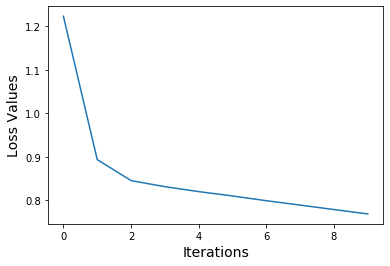

In [95]:
#Representation 
plt.plot(history.history['loss'])
plt.xlabel("Iterations", fontsize = 14)
plt.ylabel("Loss Values",fontsize = 14)
plt.show()

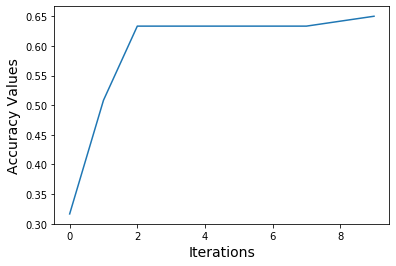

In [96]:
plt.plot(history.history['acc'])
plt.xlabel("Iterations", fontsize = 14)
plt.ylabel("Accuracy Values",fontsize = 14)
plt.show()

In [97]:
#Prediction
predicted_target = model.predict(test_data)

In [98]:
print(predicted_target)

[[0.21662275 0.4715337  0.31184348]
 [0.7193534  0.12135854 0.15928811]
 [0.8083391  0.07137637 0.12028452]
 [0.22502033 0.47162604 0.30335364]
 [0.19871818 0.49926206 0.30201972]
 [0.77358437 0.09482531 0.1315904 ]
 [0.7277462  0.11511277 0.15714103]
 [0.754066   0.09664235 0.14929165]
 [0.20349537 0.49149728 0.3050074 ]
 [0.725214   0.11361706 0.16116883]
 [0.84145415 0.0589573  0.09958851]
 [0.22544372 0.45783618 0.31672013]
 [0.8188445  0.07013476 0.11102078]
 [0.25176823 0.44747043 0.30076128]
 [0.1887993  0.5150817  0.296119  ]
 [0.19508669 0.5051217  0.29979157]
 [0.23093629 0.45041373 0.31864995]
 [0.21224672 0.47816646 0.30958676]
 [0.7600894  0.0977168  0.1421938 ]
 [0.21934618 0.485711   0.29494283]
 [0.20377572 0.49118146 0.3050429 ]
 [0.21469931 0.47434    0.31096077]
 [0.7748148  0.09121075 0.13397446]
 [0.27412465 0.42240945 0.3034659 ]
 [0.8717076  0.04821504 0.08007736]
 [0.23486815 0.4596953  0.30543655]
 [0.24207354 0.43397677 0.3239497 ]
 [0.22294982 0.46216688 0.31

In [99]:
print("pre-labels: ", np.argmax(predicted_target, axis =1))#argmax returns the position of the largest value
print("Actual_labels: ", test_target)# axis = 1 means row-wise 
#axis = 0 means column-wise execution

pre-labels:  [1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0]
Actual_labels:  [1 0 0 1 2 0 0 0 2 0 0 2 0 1 2 1 1 2 0 1 2 2 0 1 0 1 2 1 1 0]
